In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
violations = pd.read_csv("./data/food+establishment+violations (1).csv")

In [4]:
violations.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,VIOLATION,VIOLLEVEL,VIOLDESC,VIOLDTTM,VIOLSTATUS,PROPERTY_ID,LOCATION
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,NaN,NaN,NaN,,NaN,155968.0,"(42.355863000, -71.061898000)"
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,15-4-202.16,*,Non-Food Contact Surfaces,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
2,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,36-6-501.11-.12,*,Improper Maintenance of Floors,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
3,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
4,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,23-4-602.13,*,Non-Food Contact Surfaces Clean,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)"


In [5]:
violations.rename(str.lower, axis = "columns", inplace = True)

In [6]:
#some problems here, fair amount of missing data
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324898 entries, 0 to 324897
Data columns (total 15 columns):
licenseno      324898 non-null int64
issdttm        324898 non-null object
expdttm        324898 non-null object
licstatus      324898 non-null object
licensecat     324898 non-null object
descript       324898 non-null object
result         324898 non-null object
resultdttm     324898 non-null object
violation      305941 non-null object
viollevel      305941 non-null object
violdesc       305941 non-null object
violdttm       324898 non-null object
violstatus     305941 non-null object
property_id    260371 non-null float64
location       238701 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 37.2+ MB


In [7]:
#check out types of violations

In [8]:
violations["violdesc"].nunique()

89

In [10]:
#most common types of violations
violations["violdesc"].value_counts().head(10)

Non-Food Contact Surfaces Clean           24060
Improper Maintenance of Walls/Ceilings    23942
Non-Food Contact Surfaces                 20500
Improper Maintenance of Floors            19082
Food Protection                           16961
Food Contact Surfaces Clean               14833
Hand Cleaner  Drying  Tissue Signage      12158
Premises Maintained                       12025
Installed and Maintained                  10387
Food Contact Surfaces Design               9694
Name: violdesc, dtype: int64

In [11]:
#distribution of restaurant type

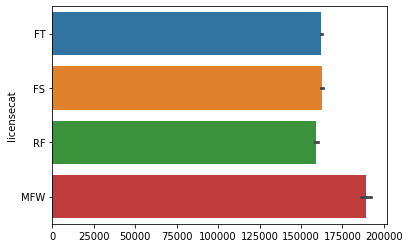

In [12]:
sns.barplot(violations.index, violations["licensecat"]);

In [13]:
violations["violstatus"].value_counts()

Fail    170462
Pass    135222
           257
Name: violstatus, dtype: int64

In [14]:
violations[violations["violstatus"]==" "]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,property_id,location
6377,20465,2/15/2012 9:02,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2/15/2012 13:39,03-3-501.16(A),***,Cold Holding,7/5/2007 15:05,,155952.0,"(42.356002000, -71.062138000)"
6378,20465,2/15/2012 9:02,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2/15/2012 13:39,08-3-302.11/3-304.11,***,Separation Segregation Cross Contamination,7/5/2007 15:06,,155952.0,"(42.356002000, -71.062138000)"
6379,20465,2/15/2012 9:02,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2/15/2012 13:39,10-3-304.12,*,Food Utensil Storage,7/5/2007 15:06,,155952.0,"(42.356002000, -71.062138000)"
6380,20465,2/15/2012 9:02,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2/15/2012 13:39,15-4-202.16,*,Non-Food Contact Surfaces,7/5/2007 15:06,,155952.0,"(42.356002000, -71.062138000)"
6382,20465,2/15/2012 9:02,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,2/15/2012 13:39,17-4-302.14,*,Test Kit Provided,7/5/2007 15:07,,155952.0,"(42.356002000, -71.062138000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81405,83449,2/27/2013 9:28,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,7/19/2013 8:40,32-6-301.11-02.11,*,Hand Cleaner Drying Tissue Signage,7/23/2013 11:28,,70338.0,"(42.352250000, -71.132078000)"
81406,83449,2/27/2013 9:28,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,7/19/2013 8:40,36-6-501.11-.12,*,Improper Maintenance of Floors,7/23/2013 11:28,,70338.0,"(42.352250000, -71.132078000)"
81407,83449,2/27/2013 9:28,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,7/19/2013 8:40,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,7/23/2013 11:28,,70338.0,"(42.352250000, -71.132078000)"
175250,145506,6/29/2015 10:47,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Filed,6/22/2015 0:00,17-4-204.112/.115,*,Equipment Thermometers,7/15/2015 10:36,,170484.0,"(42.337549000, -71.084074000)"


In [15]:
#explore violation level

In [16]:
violations["viollevel"].value_counts()

*       231071
***      55692
**       19177
1919         1
Name: viollevel, dtype: int64

In [17]:
#mistake with violation level
violations[violations["viollevel"] == "1919"]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,property_id,location
176405,17603,7/7/2008 14:41,12/31/2015 23:59,Inactive,FS,Eating & Drinking,HE_Closure,7/1/2015 8:59,02-3-305.11(2),1919,Food products protected against contamination(...,7/1/2015 9:01,,156308.0,"(42.349421000, -71.080611000)"


In [18]:
violations = violations[violations['viollevel'] != "1919"]

In [19]:
def level_to_numerics(x):
    if x == "*":
        x = 1
    elif x == "**":
        x = 2
    elif x == "***":
        x = 3
    else:
        x = np.NAN 
        
    return x

In [20]:
violations["viollevel"] = violations["viollevel"].apply(level_to_numerics)

In [21]:
violations

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,property_id,location
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,NaN,NaN,NaN,,NaN,155968.0,"(42.355863000, -71.061898000)"
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,15-4-202.16,1.0,Non-Food Contact Surfaces,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
2,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,36-6-501.11-.12,1.0,Improper Maintenance of Floors,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
3,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,37-6-501.11-.12,1.0,Improper Maintenance of Walls/Ceilings,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
4,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,23-4-602.13,1.0,Non-Food Contact Surfaces Clean,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324893,28939,1/18/2012 17:50,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,6/29/2018 14:59,42-6-501.113/.114,1.0,Premises Maintained,6/29/2018 14:59,Pass,42766.0,"(42.284680000, -71.155230000)"
324894,28939,1/18/2012 17:50,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,6/29/2018 14:59,M-2-103.11,3.0,PIC Performing Duties,6/29/2018 14:59,Pass,42766.0,"(42.284680000, -71.155230000)"
324895,23643,12/28/2011 9:38,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,6/29/2018 15:26,03-3-501.16(A),3.0,Cold Holding,6/29/2018 15:26,Fail,157523.0,"(42.351421000, -71.062558000)"
324896,23643,12/28/2011 9:38,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,6/29/2018 15:26,20-4-703.11,3.0,Food Contact Surfaces Clean,6/29/2018 15:26,Fail,157523.0,"(42.351421000, -71.062558000)"
